In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart_disease_data.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

# DATA PRE PROCESSING

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

no missing values

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(302, 14)

1 duplicate entry was deleted from the dataset

# EDA

In [8]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

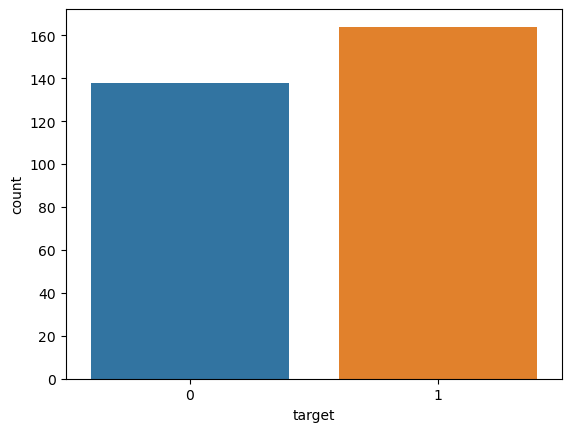

In [9]:
sns.countplot(x=data['target'],data=data)

we have a balanced data set

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

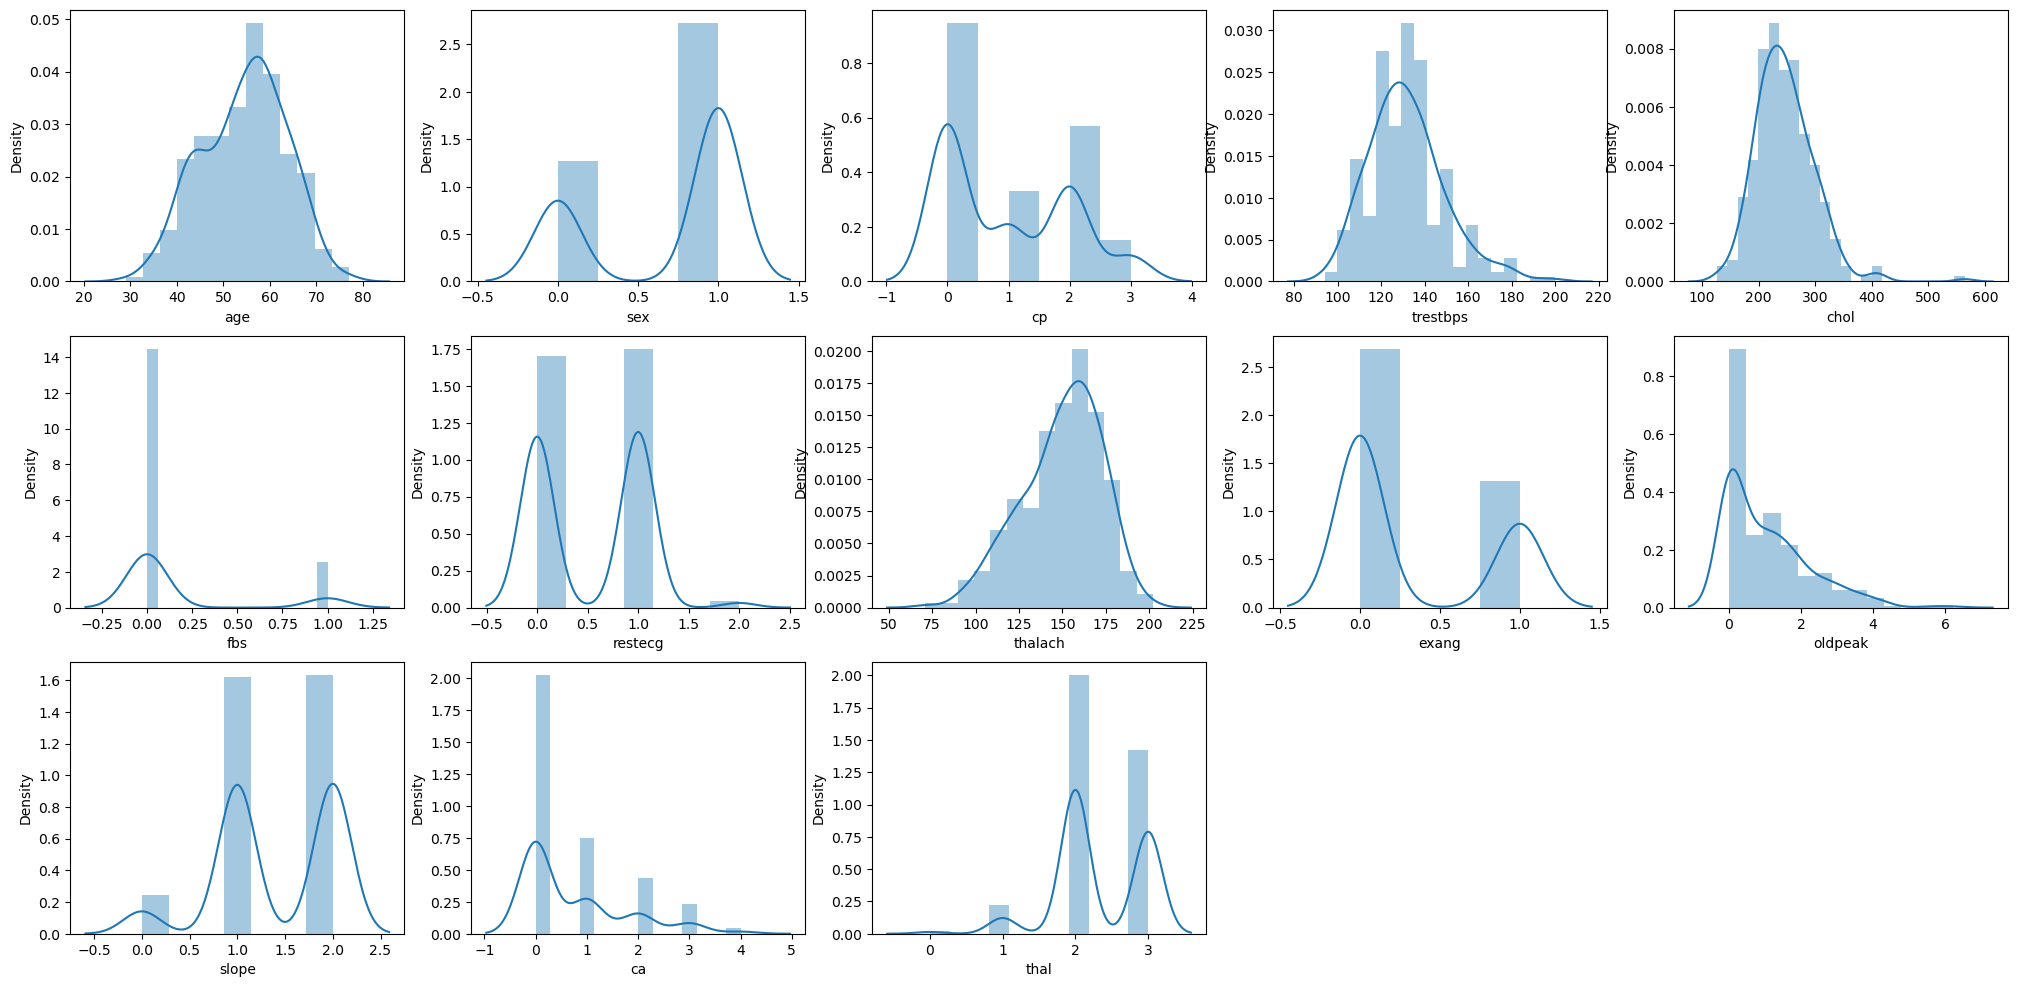

In [13]:
plt.figure(figsize=(25,12))

plotnumber =1

for i in data:
    if plotnumber <=13:
        plt.subplot(3,5,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()


as we can see sex,cp,fbs,restecg,exang,slop,ca,thal are all categorical data

In [14]:
cat_data = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [15]:
cont_data = ['age','trestbps','chol','thalach','oldpeak']

In [16]:
len(cat_data)

8

In [17]:
len(cont_data)

5

In [18]:
for i in data[cat_data]:
    print(f"{data[cat_data][i].nunique()}\n{data[cat_data][i].value_counts()}\n")

2
1    206
0     96
Name: sex, dtype: int64

4
0    143
2     86
1     50
3     23
Name: cp, dtype: int64

2
0    257
1     45
Name: fbs, dtype: int64

3
1    151
0    147
2      4
Name: restecg, dtype: int64

2
0    203
1     99
Name: exang, dtype: int64

3
2    141
1    140
0     21
Name: slope, dtype: int64

5
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

4
2    165
3    117
1     18
0      2
Name: thal, dtype: int64



In [19]:
cat_data

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

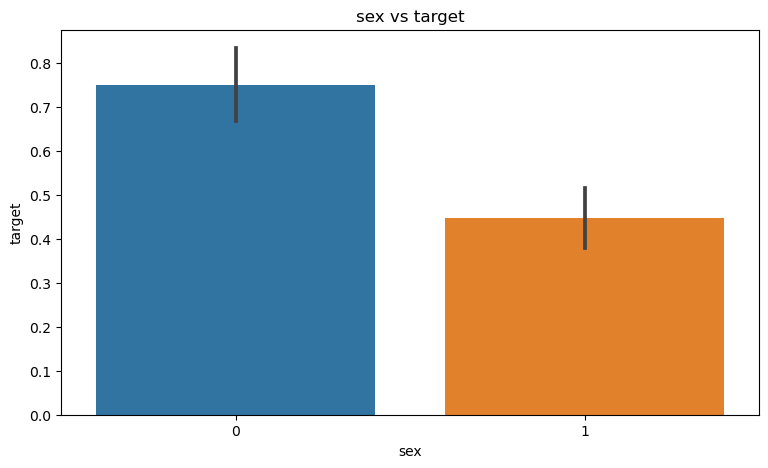

In [20]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['sex'],y = data['target'])

plt.title('sex vs target')

plt.xlabel('sex')

plt.ylabel('target')

plt.show()

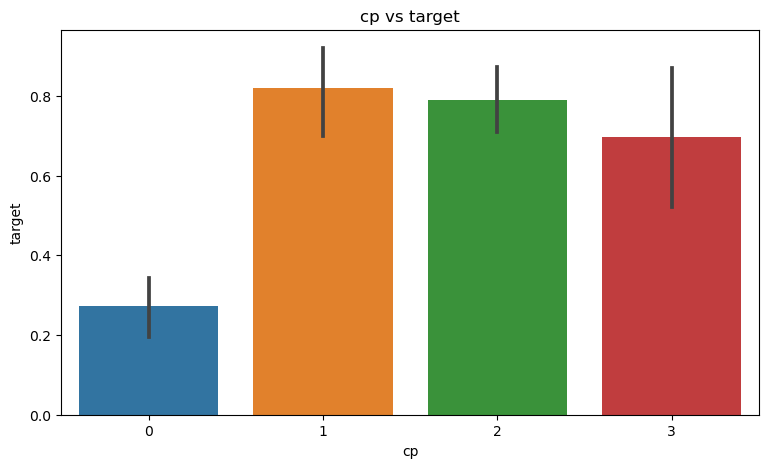

In [21]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['cp'],y = data['target'])

plt.title('cp vs target')

plt.xlabel('cp')

plt.ylabel('target')

plt.show()

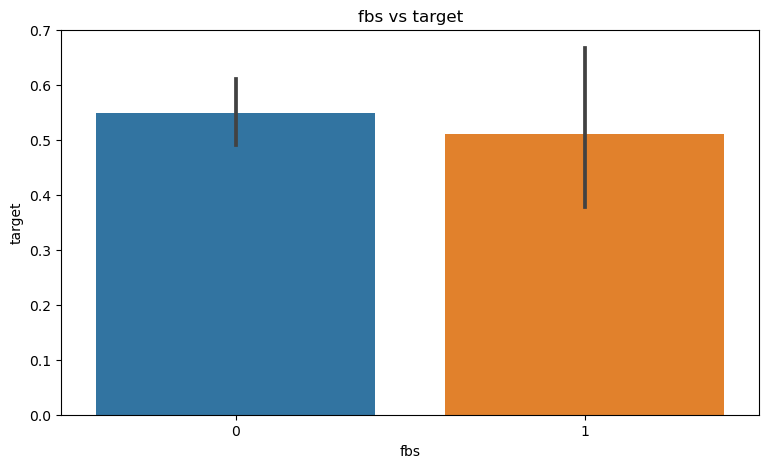

In [22]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['fbs'],y = data['target'])

plt.title('fbs vs target')

plt.xlabel('fbs')

plt.ylabel('target')

plt.show()

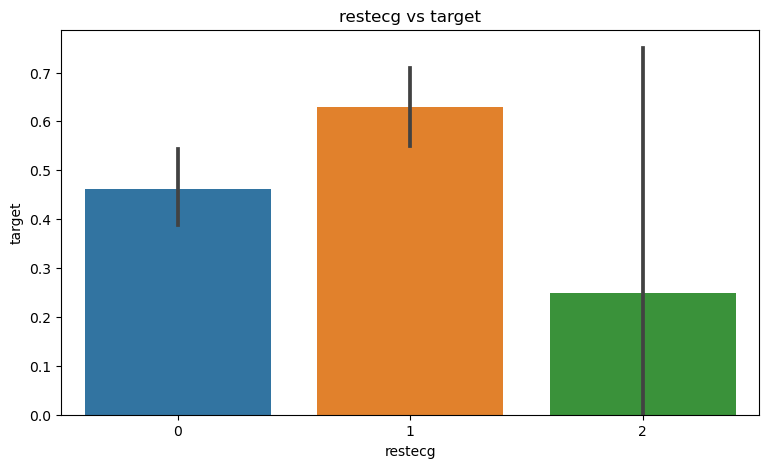

In [23]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['restecg'],y = data['target'])

plt.title('restecg vs target')

plt.xlabel('restecg')

plt.ylabel('target')

plt.show()

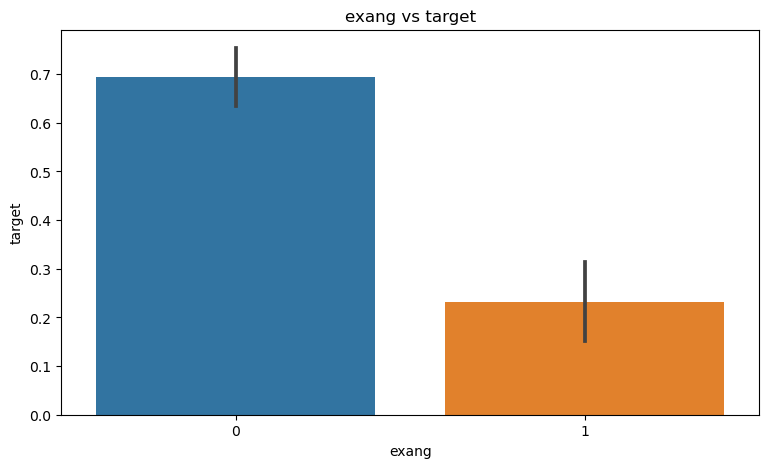

In [24]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['exang'],y = data['target'])

plt.title('exang vs target')

plt.xlabel('exang')

plt.ylabel('target')

plt.show()

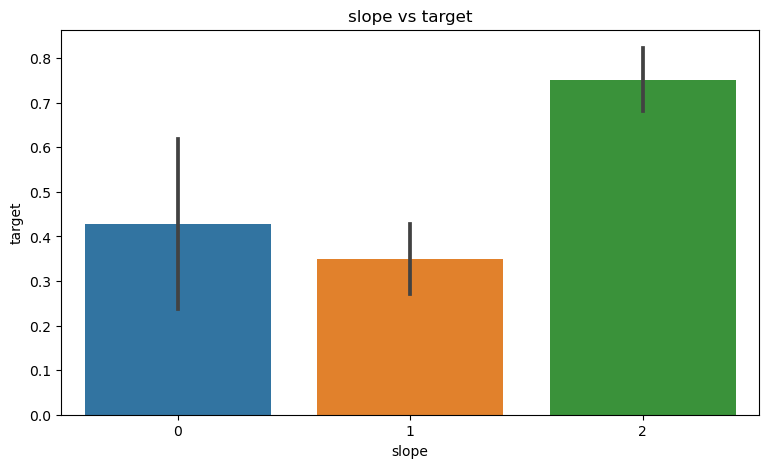

In [25]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['slope'],y = data['target'])

plt.title('slope vs target')

plt.xlabel('slope')

plt.ylabel('target')

plt.show()

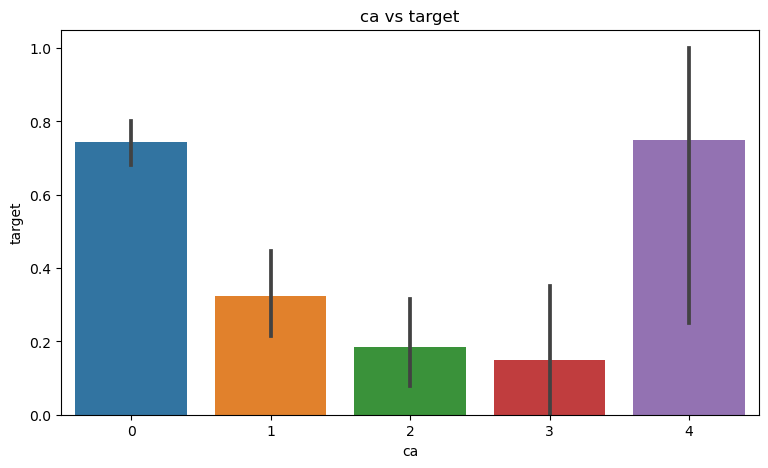

In [26]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['ca'],y = data['target'])

plt.title('ca vs target')

plt.xlabel('ca')

plt.ylabel('target')

plt.show()

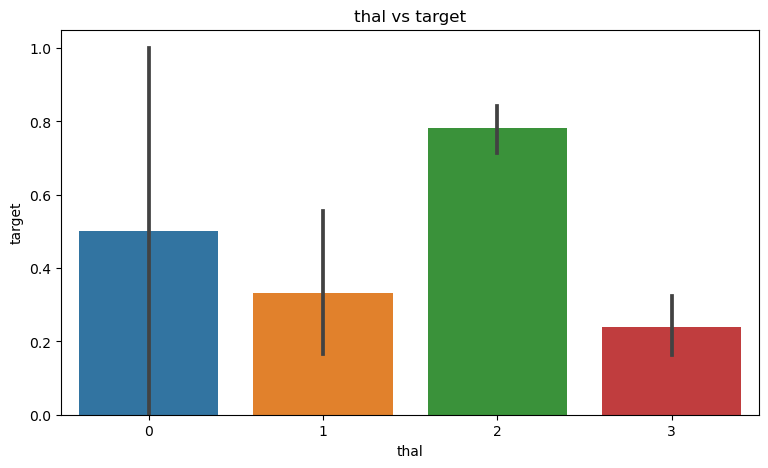

In [27]:
plt.figure(figsize=(9,5))

sns.barplot(x=data['thal'],y = data['target'])

plt.title('thal vs target')

plt.xlabel('thal')

plt.ylabel('target')

plt.show()

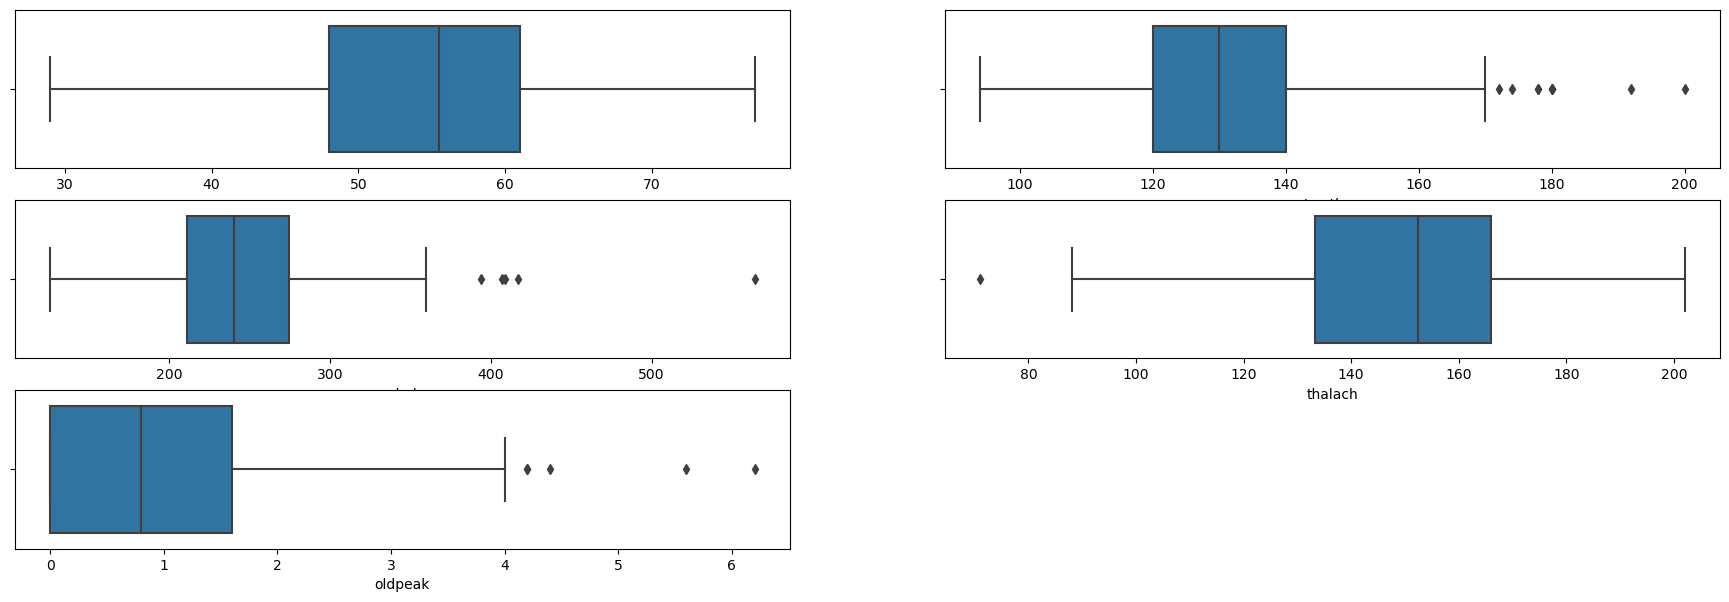

In [28]:
plt.figure(figsize=(22,7))

plotnumber =1

for i in data[cont_data]:
    if plotnumber <=5:
        plt.subplot(3,2,plotnumber)
        sns.boxplot(x=data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

outliers are present

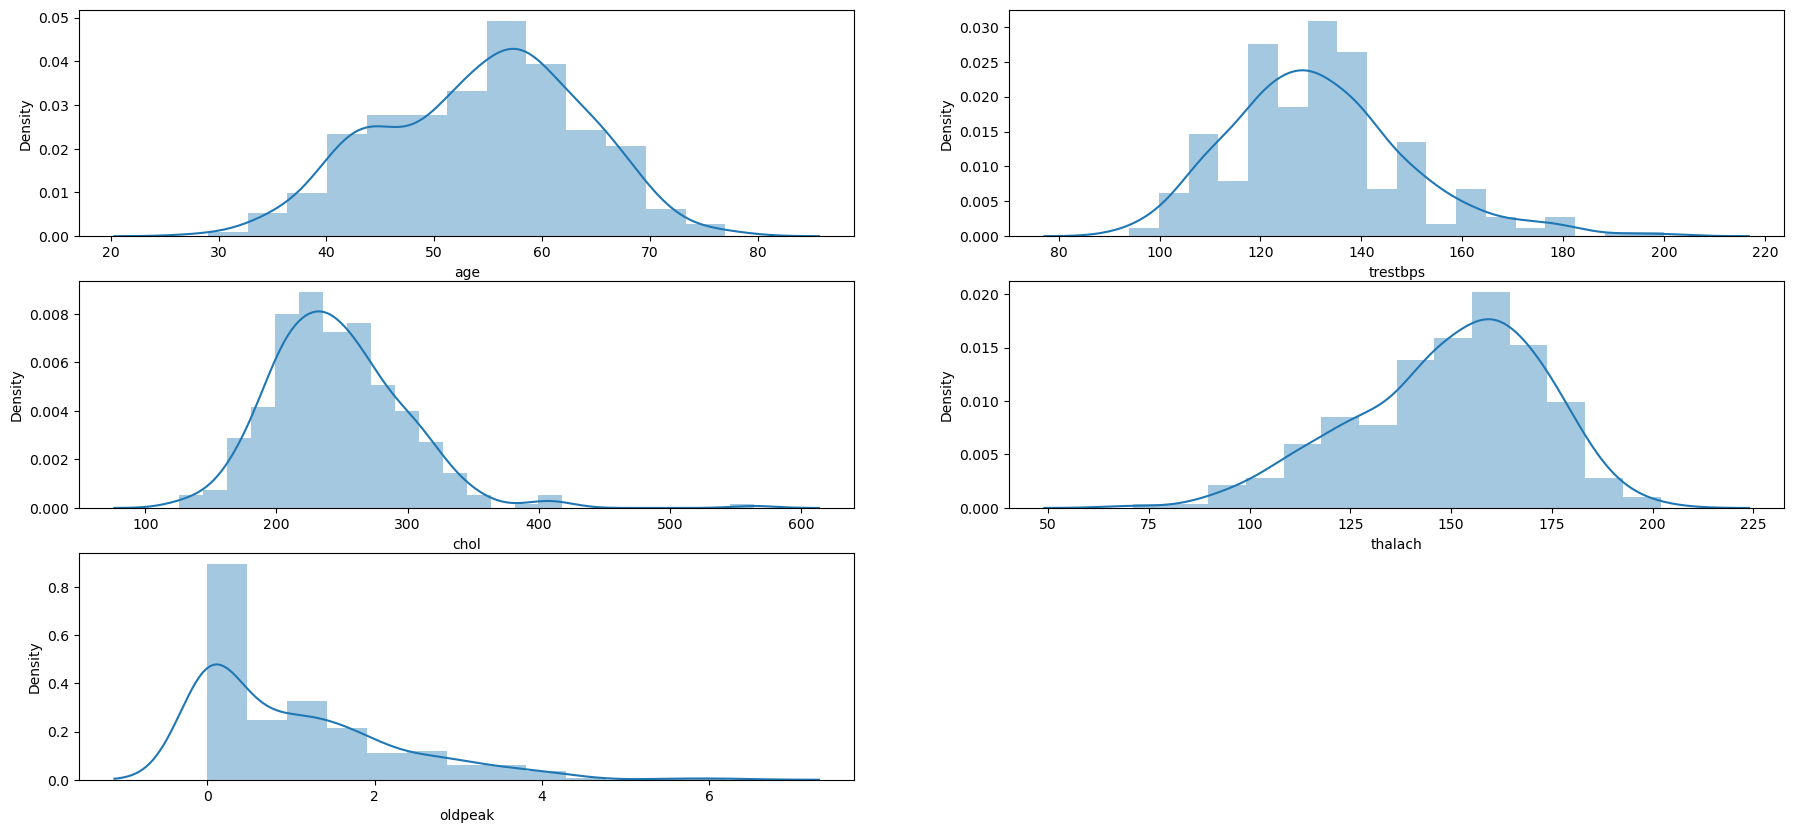

In [29]:
plt.figure(figsize=(22,10))

plotnumber =1

for i in data[cont_data]:
    if plotnumber <=5:
        plt.subplot(3,2,plotnumber)
        sns.distplot(data[cont_data][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

data is normally distributed but skewness is there

# dealing with outliers

In [30]:
z = zscore(data[cont_data])

In [31]:
data = data[(z<3).all(axis=1)]

In [32]:
data.shape

(294, 14)

In [33]:
data_loss = (302-294)/302

In [34]:
data_loss

0.026490066225165563

In [35]:
data[cont_data].skew().sort_values()

thalach    -0.552177
age        -0.177461
chol        0.269891
trestbps    0.538731
oldpeak     1.010069
dtype: float64

data is skewed

# FEATURE SELECTION

In [36]:
data.corr()['target'].sort_values()

exang      -0.435990
oldpeak    -0.423973
ca         -0.399033
thal       -0.330200
sex        -0.302810
age        -0.226465
trestbps   -0.113838
chol       -0.103901
fbs        -0.032780
restecg     0.129414
slope       0.332117
cp          0.419720
thalach     0.427875
target      1.000000
Name: target, dtype: float64

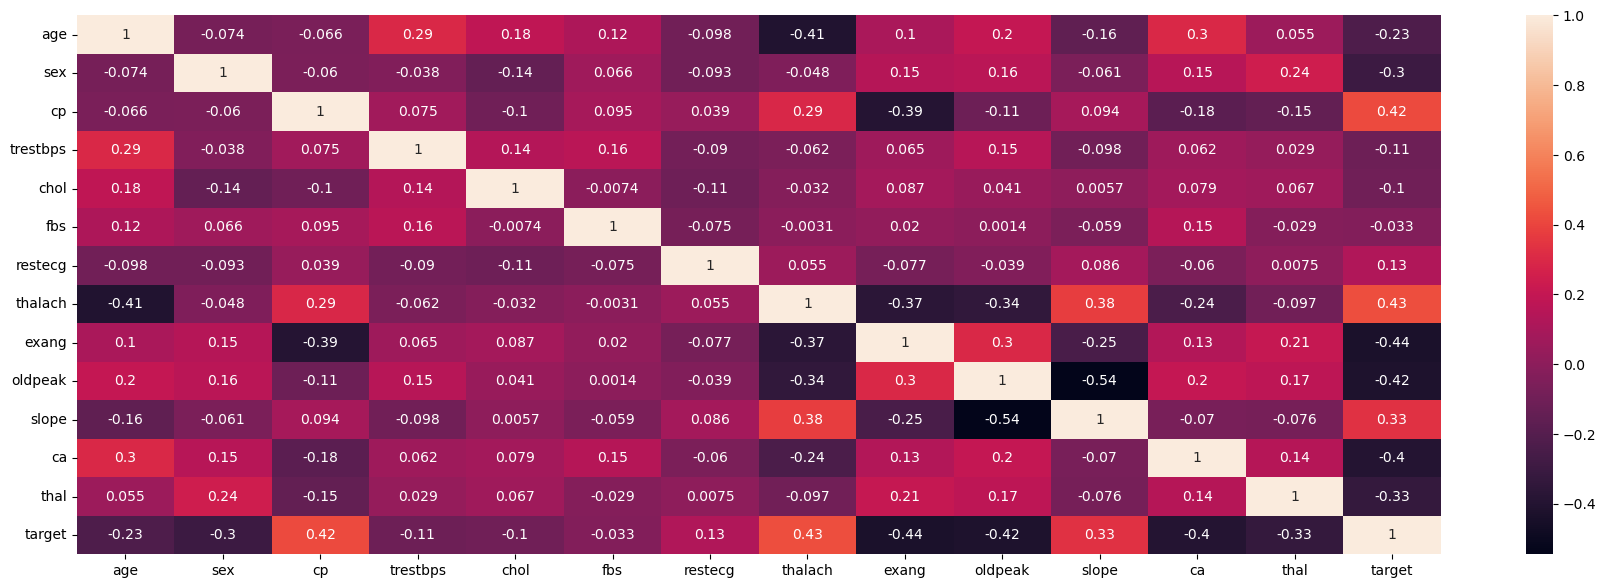

In [37]:
plt.figure(figsize=(22,7))

sns.heatmap(data.corr(),annot=True)

plt.show()

no data co-realtion present

fbs,chol,trestbps has very less realtion with the target so we can drop it 

In [38]:
data.drop(['fbs','chol','trestbps'],axis=1,inplace=True)

In [39]:
cat_data

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [40]:
cont_data

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [41]:
cat_data.remove('fbs')

In [42]:
cont_data.remove('chol')

In [43]:
cont_data.remove('trestbps')

we have skewness problem se we're applying powertransformer

In [44]:
pt = PowerTransformer()

In [45]:
X = data.drop('target',axis=1)

y = data['target']

In [46]:
x = pt.fit_transform(X)

In [47]:
x = pd.DataFrame(x,columns=X.columns)

In [48]:
x.head()

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.964525,0.664211,1.485208,-1.038847,-0.080906,-0.696311,1.227533,-2.000072,-0.823211,-1.940769
1,-1.831284,0.664211,1.052371,0.913383,1.889309,-0.696311,1.650083,-2.000072,-0.823211,-0.556760
2,-1.436017,-1.505545,0.370724,-1.038847,1.023251,-0.696311,0.721430,1.011340,-0.823211,-0.556760
3,0.162434,0.664211,0.370724,0.913383,1.358480,-0.696311,0.191150,1.011340,-0.823211,-0.556760
4,0.274966,-1.505545,-1.019742,0.913383,0.548017,1.436141,-0.048462,1.011340,-0.823211,-0.556760


In [49]:
x[cont_data].skew().sort_values()

thalach   -0.081825
age       -0.049568
oldpeak    0.121388
dtype: float64

skewness has been reduced to acceptable level

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

# LR

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
pred1 = lr.predict(x_train)

In [54]:
pred2 = lr.predict(x_test)

In [55]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred1)}')

TRAINING ACCURACY: 0.8595744680851064


In [56]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred2)}')

TEST ACCURACY: 0.8983050847457628


In [57]:
a1 = accuracy_score(y_train,pred1)

In [58]:
a2 = accuracy_score(y_test,pred2)

In [59]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.91        33

    accuracy                           0.90        59
   macro avg       0.90      0.89      0.90        59
weighted avg       0.90      0.90      0.90        59



In [60]:
print(confusion_matrix(y_test,pred2))

[[22  4]
 [ 2 31]]


In [61]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.8500292226767971

In [62]:
roc_auc_score(y_test,pred2)

0.8927738927738927

# KNN

In [63]:
knn = KNeighborsClassifier()

In [64]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
pred3 = knn.predict(x_train)

In [66]:
pred4 = knn.predict(x_test)

In [67]:
a4 = accuracy_score(y_train,pred3)

In [68]:
a5 = accuracy_score(y_test,pred4)

In [69]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred3)}')

TRAINING ACCURACY: 0.8680851063829788


In [70]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred4)}')

TEST ACCURACY: 0.864406779661017


In [71]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.82      0.97      0.89        33

    accuracy                           0.86        59
   macro avg       0.89      0.85      0.86        59
weighted avg       0.88      0.86      0.86        59



In [72]:
print(confusion_matrix(y_test,pred2))

[[22  4]
 [ 2 31]]


In [73]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.8433080070134424

In [74]:
roc_auc_score(y_test,pred4)

0.8502331002331003

# DT

In [75]:
dt = DecisionTreeClassifier()

In [76]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
pred5 = dt.predict(x_train)

In [78]:
pred6 = dt.predict(x_test)

In [79]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred5)}')

TRAINING ACCURACY: 1.0


In [80]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred6)}')

TEST ACCURACY: 0.7457627118644068


In [81]:
a7 = accuracy_score(y_train,pred5)

In [82]:
a8 = accuracy_score(y_test,pred6)

In [83]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.7275277615429573

In [84]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.78      0.76      0.77        33

    accuracy                           0.75        59
   macro avg       0.74      0.74      0.74        59
weighted avg       0.75      0.75      0.75        59



In [85]:
print(confusion_matrix(y_test,pred6))

[[19  7]
 [ 8 25]]


In [86]:
roc_auc_score(y_test,pred6)

0.7441724941724942

# RF

In [87]:
rf = RandomForestClassifier()

In [88]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [89]:
pred7 = rf.predict(x_train)

In [90]:
pred8 = rf.predict(x_test)

In [91]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred7)}')

TRAINING ACCURACY: 1.0


In [92]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred8)}')

TEST ACCURACY: 0.9152542372881356


In [93]:
a10 = accuracy_score(y_train,pred7)

In [94]:
a11 = accuracy_score(y_test,pred8)

In [95]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.8194623027469315

In [96]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.89      0.97      0.93        33

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59



In [97]:
print(confusion_matrix(y_test,pred8))

[[22  4]
 [ 1 32]]


In [98]:
roc_auc_score(y_test,pred8)

0.907925407925408

# ADA

In [99]:
ada = AdaBoostClassifier()

In [100]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [101]:
pred9 = ada.predict(x_train)

In [102]:
pred10 = ada.predict(x_test)

In [103]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred9)}')

TRAINING ACCURACY: 0.8936170212765957


In [104]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred10)}')

TEST ACCURACY: 0.8305084745762712


In [105]:
a13 = accuracy_score(y_train,pred9)

In [106]:
a14 = accuracy_score(y_test,pred10)

In [107]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.799240210403273

In [108]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.81      0.91      0.86        33

    accuracy                           0.83        59
   macro avg       0.84      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59



In [109]:
print(confusion_matrix(y_test,pred10))

[[19  7]
 [ 3 30]]


In [110]:
roc_auc_score(y_test,pred10)

0.81993006993007

# GBDT

In [111]:
gb = GradientBoostingClassifier()

In [112]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [113]:
pred11 = gb.predict(x_train)

In [114]:
pred12 = gb.predict(x_test)

In [115]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred11)}')

TRAINING ACCURACY: 0.9872340425531915


In [116]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred12)}')

TEST ACCURACY: 0.8135593220338984


In [117]:
a16 = accuracy_score(y_train,pred11)

In [118]:
a17 = accuracy_score(y_test,pred12)

In [119]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.7958503798947985

In [120]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.81      0.88      0.84        33

    accuracy                           0.81        59
   macro avg       0.82      0.80      0.81        59
weighted avg       0.81      0.81      0.81        59



In [121]:
print(confusion_matrix(y_test,pred12))

[[19  7]
 [ 4 29]]


In [122]:
roc_auc_score(y_test,pred12)

0.8047785547785549

# XGBOOST

In [123]:
xg = XGBClassifier()

In [124]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [125]:
pred13 = xg.predict(x_train)

In [126]:
pred14 = xg.predict(x_test)

In [127]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred13)}')

TRAINING ACCURACY: 1.0


In [128]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred14)}')

TEST ACCURACY: 0.847457627118644


In [129]:
a19 = accuracy_score(y_train,pred13)

In [130]:
a20 = accuracy_score(y_test,pred14)

In [131]:
cv = cross_val_score(xg,x,y)

a21 = cv.mean()

a21

0.7720046756282875

In [132]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.85      0.88      0.87        33

    accuracy                           0.85        59
   macro avg       0.85      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59



In [133]:
print(confusion_matrix(y_test,pred14))

[[21  5]
 [ 4 29]]


In [134]:
roc_auc_score(y_test,pred14)

0.8432400932400932

# SVM

In [135]:
svm = SVC()

In [136]:
svm.fit(x_train,y_train)

SVC()

In [137]:
pred15 = svm.predict(x_train)

In [138]:
pred16 = svm.predict(x_test)

In [139]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,pred15)}')

TRAINING ACCURACY: 0.8978723404255319


In [140]:
print(f'TEST ACCURACY: {accuracy_score(y_test,pred16)}')

TEST ACCURACY: 0.864406779661017


In [141]:
a22 = accuracy_score(y_train,pred15)

In [142]:
a23 = accuracy_score(y_test,pred16)

In [143]:
cv = cross_val_score(svm,x,y)

a24 = cv.mean()

a24

0.8364114552893044

In [144]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.84      0.94      0.89        33

    accuracy                           0.86        59
   macro avg       0.87      0.85      0.86        59
weighted avg       0.87      0.86      0.86        59



In [145]:
print(confusion_matrix(y_test,pred16))

[[20  6]
 [ 2 31]]


In [146]:
roc_auc_score(y_test,pred16)

0.8543123543123543

In [147]:
train = []
test = []
cv = []

In [148]:
model = ['LR','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [149]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

In [150]:
result = pd.DataFrame({'MODEL':model,'TRAIN SCORE':train,'TEST SCORE':test,'CV SCORE':cv})

In [151]:
result

,MODEL,TRAIN SCORE,TEST SCORE,CV SCORE
0,LR,0.859574,0.898305,0.850029
1,KNN,0.868085,0.864407,0.843308
2,DT,1.000000,0.745763,0.727528
3,RF,1.000000,0.915254,0.819462
4,ADA,0.893617,0.830508,0.799240
5,GBDT,0.987234,0.813559,0.795850
6,XGBOOST,1.000000,0.847458,0.772005
7,SVM,0.897872,0.864407,0.836411


KNN IS THE BEST RESULT FROM ALL ABOVE

# HYPER PARAMETER TUNING

In [152]:
knn = KNeighborsClassifier()

In [153]:
para = {'n_neighbors':[3,4,5,6,7],
       'weights':['uniform', 'distance'],
       'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [154]:
gs = GridSearchCV(knn,para,n_jobs=-1)

In [155]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [156]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [157]:
gs.best_estimator_.fit(x_train,y_train)

KNeighborsClassifier()

In [158]:
trainpred = gs.best_estimator_.predict(x_train)

In [160]:
testpred = gs.best_estimator_.predict(x_test)

In [161]:
print(f'TRAINING ACCURACY: {accuracy_score(y_train,trainpred)}')

TRAINING ACCURACY: 0.8680851063829788


In [162]:
print(f'TEST ACCURACY: {accuracy_score(y_test,testpred)}')

TEST ACCURACY: 0.864406779661017


In [165]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.82      0.97      0.89        33

    accuracy                           0.86        59
   macro avg       0.89      0.85      0.86        59
weighted avg       0.88      0.86      0.86        59



In [164]:
print(confusion_matrix(y_test,testpred))

[[19  7]
 [ 1 32]]


In [167]:
roc_auc_score(y_test,testpred)

0.8502331002331003

In [168]:
fpr,tpr,threshold = roc_curve(y_test,testpred)

In [169]:
cv = cross_val_score(gs.best_estimator_,x,y)

cv_mean = cv.mean()

cv_mean

0.8433080070134424

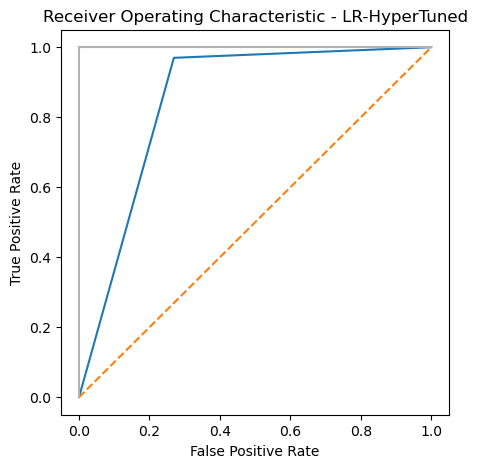

In [170]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - LR-HyperTuned')
plt.plot(fpr,tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [171]:
conclusion = pd.DataFrame({'REAL VALUES':y_test,'PREDICTED':testpred})

In [173]:
conclusion

,REAL VALUES,PREDICTED
119,1,1
289,0,0
210,0,1
213,0,0
201,0,0
266,0,0
108,1,1
176,0,0
299,0,1
10,1,1
